### Exploración del dataset

Veamos algunas observables e histogramas de participantes de los experimentos coronadélicos y OCEAN.

Comenzamos cargando y mergeando ambos datasets, conservando aquellos participantes de ambos experimentos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Dataset OCEAN
filename = '/content/drive/My Drive/LaboDatos2021/ocean_safe.csv'

# Cargamos de base solo aquellas columnas que nos interesa (útil para df grandes)
columnas_ocean = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness', '2_edad', '2_genero', 'hash']
df_ocean = pd.read_csv(filename, usecols = columnas_ocean)

In [ ]:
df_ocean.head()

,1_extraversion,1_agreeableness,1_conscientiousness,1_neuroticism,1_openness,2_edad,2_genero,hash
0,27,31,31,37,32,21,1,-423577603735016669
1,16,37,26,31,45,33,2,-464971106993132614
2,23,33,38,22,44,29,1,8850189905759099157
3,20,25,25,20,18,24,2,8502285657236737218
4,22,34,24,35,42,35,2,5668714742513791951


In [ ]:
# Coronadelicos
filename = '/content/drive/My Drive/LaboDatos2021/coronadelicos_safe.csv'
df_coronadelicos = pd.read_csv(filename)

In [ ]:
# Interseccion
df_combinado = pd.merge(df_coronadelicos, df_ocean, how='inner', on='hash')

### Estadística de algunas características

Estudiamos por ejemplo las edades de los participantes y el índice de religiosidad.

In [ ]:
# Edades de los participantes del experimento
edades = df_combinado['2_edad']

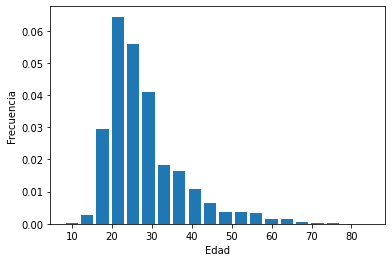

Media: 28.099806
Varianza: 90.598
Desviacion: 9.518
90% central: 18.0 - 48.0
Mediana: 26.0
Moda: [22]


In [ ]:
# Histograma
ax = edades.hist(bins = 20, grid = False, rwidth = 0.80, cumulative = False, density = True)
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
plt.show()

# Observables
print('Media: {:3f}'.format(edades.mean()))
print('Varianza: {:.3f}'.format(edades.var()))
print('Desviacion: {:.3f}'.format(edades.std()))
print('90% central: {} - {}'.format(*edades.quantile([0.05, 0.95])))
print('Mediana: {}'.format(edades.median()))
print('Moda: {}'.format(edades.mode().values))

Esto es bastante informativo: el 90% de los participantes están entre 18 y 48 años, pero la mayor cantidad de los participantes tienen 22 años.

Media: 16.326979
Desviacion: 23.563
90% central: 0.0 - 70.0
Mediana: 5.0
Moda: [0]


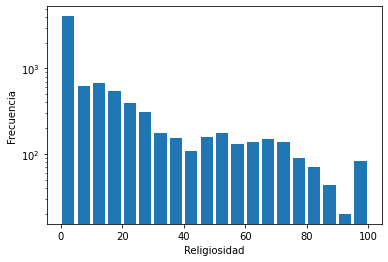

In [ ]:
# Religiosidad
religiosidad = df_combinado['0_religiosidad']

# Histograma. La frecuencia en escala logaritmica es una buena opcion.
#ax = religiosidad.hist(bins = 20, grid = False, rwidth = 0.80)
ax = religiosidad.hist(bins = 20, grid = False, rwidth = 0.80, log = True)
ax.set_xlabel('Religiosidad')
ax.set_ylabel('Frecuencia')

# Observables
print('Media: {:3f}'.format(religiosidad.mean()))
print('Desviacion: {:.3f}'.format(religiosidad.std()))
print('90% central: {} - {}'.format(*religiosidad.quantile([0.05, 0.95])))
print('Mediana: {}'.format(religiosidad.median()))
print('Moda: {}'.format(religiosidad.mode().values))

Notar que en el caso de la religiosidad, la media y la desviación no son muy buenos descriptores de la distribución.

Veamos los índices que hablan de la personalidad:

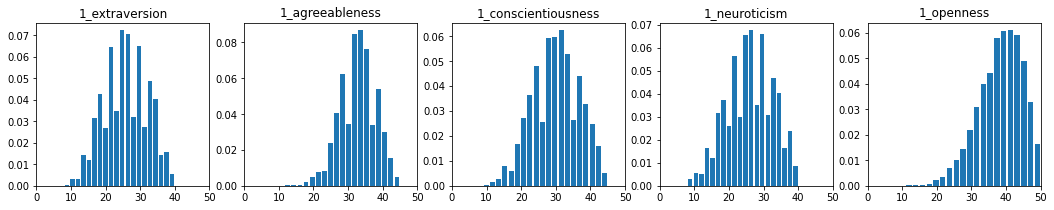

In [ ]:
personalidades = ['1_extraversion', '1_agreeableness', '1_conscientiousness',
       '1_neuroticism', '1_openness']

fig, ax = plt.subplots(nrows = 1, ncols=5, figsize = (18, 3))
for i in range(len(personalidades)):
  ax[i].hist(df_combinado[personalidades[i]], bins = 20, rwidth = 0.80, density = True)
  ax[i].set_title(personalidades[i])
  ax[i].set_xlim([0, 50])
plt.show()

In [ ]:
# Observables las personalidades
for p in personalidades:
  print(p)
  print('Media: {:3f}'.format(df_combinado[p].mean()))
  print('Desviacion: {:.3f}'.format(df_combinado[p].std()))
  print('90% central: {} - {}'.format(*df_combinado[p].quantile([0.05, 0.95])))
  print('Mediana: {}'.format(df_combinado[p].median()))
  print('Moda: {}'.format(df_combinado[p].mode().values))
  print('\n')

1_extraversion
Media: 25.731180
Desviacion: 6.203
90% central: 15.0 - 36.0
Mediana: 26.0
Moda: [25]


1_agreeableness
Media: 32.692933
Desviacion: 5.118
90% central: 24.0 - 41.0
Mediana: 33.0
Moda: [33]


1_conscientiousness
Media: 29.954832
Desviacion: 6.690
90% central: 19.0 - 41.0
Mediana: 30.0
Moda: [31]


1_neuroticism
Media: 25.952647
Desviacion: 6.651
90% central: 15.0 - 37.0
Mediana: 26.0
Moda: [28]


1_openness
Media: 38.543832
Desviacion: 6.454
90% central: 27.0 - 48.0
Mediana: 39.0
Moda: [43]




### Correlaciones

Con los coeficientes de correlación podemos ver comenzar a identificar relaciones entre distintas variables.

Pearson 0.0413369057219645
Spearman -0.0021008510640424297


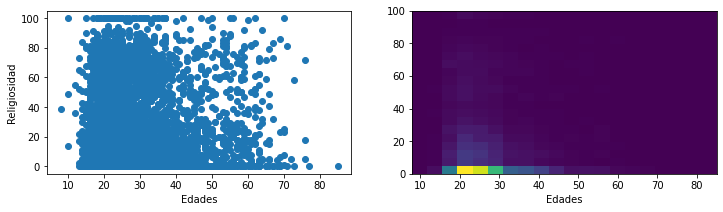

In [ ]:
from scipy.stats import pearsonr, spearmanr

# ¿Habrá alguna relación entre la religiosidad y edad de la persona?
print('Pearson {}'.format(pearsonr(religiosidad, edades)[0]))
print('Spearman {}'.format(spearmanr(religiosidad, edades)[0]))

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 3))
ax[0].scatter(edades, religiosidad)
ax[1].hist2d(edades, religiosidad, bins = 20)

ax[0].set_ylabel('Religiosidad')
ax[0].set_xlabel('Edades')
ax[1].set_xlabel('Edades')

plt.show()

In [ ]:
# ¿Habrá alguna relación entre la edad y las personalidades?

personalidades = ['1_extraversion', '1_agreeableness', '1_conscientiousness',
       '1_neuroticism', '1_openness']

for personalidad in personalidades:
  pear = pearsonr(df_combinado[personalidad], df_combinado['2_edad'])[0]
  spear = spearmanr(df_combinado[personalidad], df_combinado['2_edad'])[0]

  print('{} - Pearson {:.3f} - Spearman {:.3f}'.format(personalidad, pear, spear))

1_extraversion - Pearson 0.036 - Spearman 0.038
1_agreeableness - Pearson 0.092 - Spearman 0.072
1_conscientiousness - Pearson 0.179 - Spearman 0.170
1_neuroticism - Pearson -0.178 - Spearman -0.182
1_openness - Pearson 0.082 - Spearman 0.086


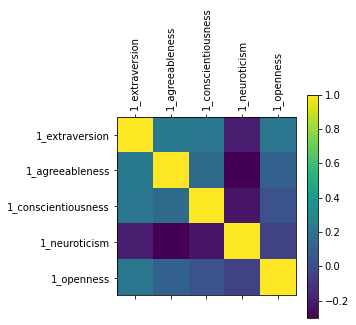

In [ ]:
# Correlación entre personalidades?
plt.matshow(df_combinado[personalidades].corr(method = 'spearman'))
plt.yticks(range(len(personalidades)), personalidades)
plt.xticks(range(len(personalidades)), personalidades, rotation = 90)
plt.colorbar()
plt.show()

# Ejercicios



Existe una peculiaridad interesante sobre los números relativamente grandes, y es la siguiente:

Supongan que consideran una lista de números grandes; pueden ser, por ejemplo, cifras de transacciones bancarias, votos recibidos por distintos candidatos en una elección, milimetros de lluvia anuales, etc. Para cada uno de estos fenómenos, consideremos la probabilidad de que las cifras comiencen con los dígitos 1, 2, 3, 4, 5, 6, 7, 8, 9. Uno pensaría que esa probabilidad es homogénea: no hay un motivo *a priori* para pensar que en estos datos tienden a comenzar sistemáticamente con algún número por encima de otros.

**Pero este no es el caso.** Es notoriamente más probable que la cifras comiencen con 1, sigue en probabilidad que comiencen con 2, 3, 4, etc. En general, la probabilidad viene dada, aproximadamente, por $P(n) = kn^{-\alpha}$ (ley de potencias). Esto se conoce como **Ley de Benford**.

Los motivos por los cuales los números grandes siguen la ley de Benford son complicados y pueden consultarlos en el artículo correspondiente de Wikipedia (https://en.wikipedia.org/wiki/Benford%27s_law). Por ahora vamos a contentarnos con mostrar que la ley se cumple en algunos datos experimentales y hacer algunos experimentos numéricos.

Algo importante es que esto no es un ejercicio académico. La ley de Benford se usa, entre otras cosas, para detectar fraudes de distinto tipo. Si una persona inventa números de transacciones bancarias, por ejemplo, va a tender a creer que debe inventar números cuyos dígitos iniciales estén homogéneamente distribuidos, y simplemente eso no es lo que pasa (hasta hay una referencia a la ley en Ozark, y todo). Acá hay una linda nota sobre la significancias de la ley de Benford en la ciencia de datos: https://towardsdatascience.com/what-is-benfords-law-and-why-is-it-important-for-data-science-312cb8b61048

El primer objetivo de este ejercicio es estudiar si se cumple la ley (cualitativamente) en datos sobre elecciones presidenciales en EEUU.

Para eso, primero vamos a instalar y cargar la libreria benfordslaw que tiene los datos que buscamos. Nunca instalamos una librería en Colab, pero es tan fácil como el código a continuación:


In [ ]:
pip install benfordslaw


Luego, cargamos los datos de votos recibidos por distintos candidatos (en este caso, Hillary Clinton) en un vector X.

In [ ]:
from benfordslaw import benfordslaw
import numpy as np
import matplotlib.pyplot as plt

bl = benfordslaw(alpha=0.05)
df = bl.import_example(data='USA')
X = df['votes'].loc[df['candidate']=='Hillary Clinton'].values



[benfordslaw] >Import dataset [USA]


El objetivo es construir una función que calcule la probabilidad de encontrar un número de votos que comience con 1, 2, 3, etc y graficarla, para verificar que se obtiene un gráfico como el siguiente:

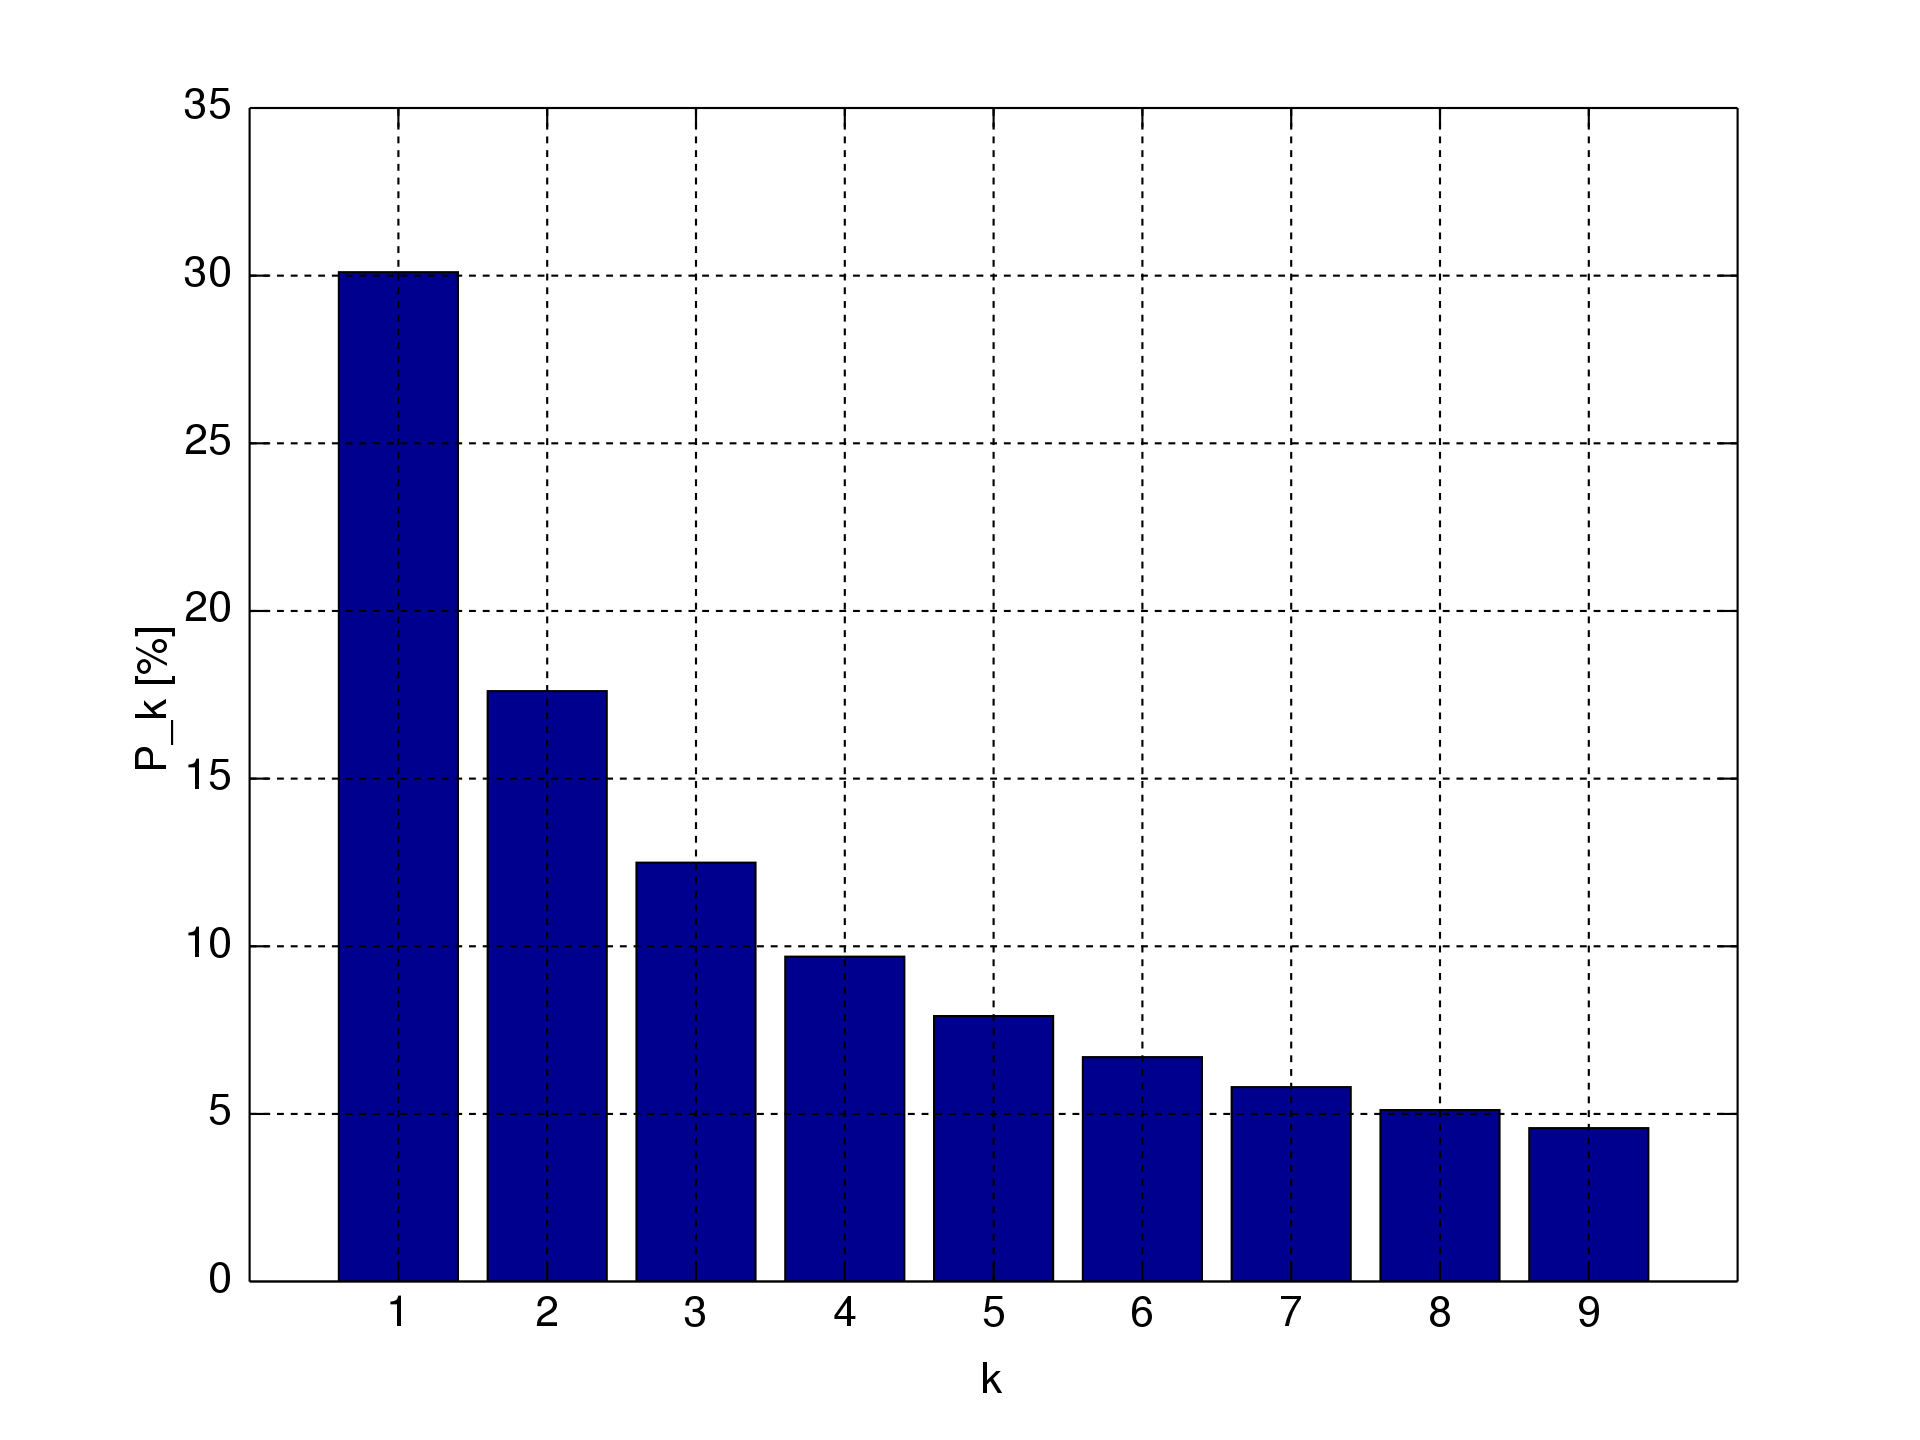

Como segunda parte del ejercicio, generar muchos números grandes (al menos 4 o 5 órdenes de magnitud) al azar usando la distribución homogénea y la normal. Verificar si se cumple o no la ley de Benford para los números aleatorios generados, y pensar por que.